In [1]:
import Laplin as lp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = 'Amostra H/amostraH_tratada.txt'
cpmg = lp.ExpData()
cpmg.loadFile(file,1,2)

In [3]:
for i in range(len(cpmg.x)):
    cpmg.x[i] *= 1e-3

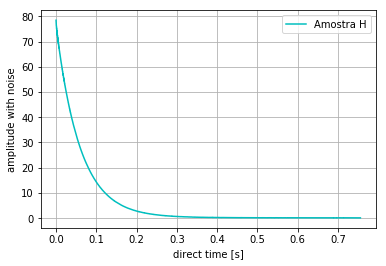

In [4]:
plt.plot(cpmg.x,cpmg.yn,'c-')
plt.xlabel('direct time [s]')
plt.ylabel('amplitude with noise')
plt.grid(True)
plt.legend(['Amostra H'],loc=0)
plt.savefig('Decay_H.png',dpi=300)

O pico de intensidade ocorre para T2 = 61.3590727341 +/- 5.71670237619 ms.
Amostra H, com intervalo de 100 pontos entre 1e-4 e 1e0 do espaço inverso.


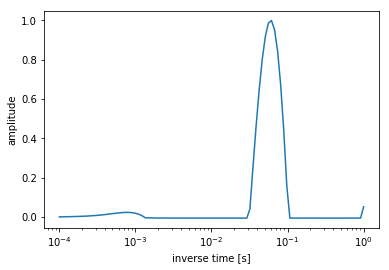

In [5]:
reg = lp.InvLaplace(cpmg, 0)
reg.genX(1e-4,1e0,100)
reg.genY([5e-1,1e-3,0], 0, 'nn0')

N = max(reg.Y)
for j in range(len(reg.Y)):
    reg.Y[j] /= N

for k in range(len(reg.Y)-1):
    if reg.Y[k-1] < reg.Y[k] and reg.Y[k+1] < reg.Y[k] and reg.Y[k] > 0.2:
        print 'O pico de intensidade ocorre para T2 =', reg.X[k]/1e-3, '+/-', (reg.X[k+1] - reg.X[k-1])/2e-3, 'ms.'

print 'Amostra H, com intervalo de', len(reg.X), 'pontos entre 1e-4 e 1e0 do espaço inverso.'

reg.plotData()

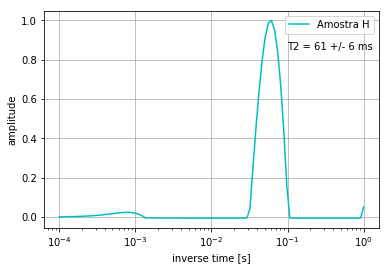

In [7]:
plt.plot(reg.X,reg.Y,'c-')
plt.xlabel('inverse time [s]')
plt.ylabel('amplitude')
plt.xscale('log')
plt.grid(True)
plt.legend(['Amostra H'], loc=0)
plt.text(1e-1, 0.85, 'T2 = 61 +/- 6 ms')
plt.savefig('H_inverse.png', dpi=300)